# Report

In [1]:
from class_types_methods.stats import imbalance_ratio, label_minority, label_minority_mul
from class_types_methods.resampling import SimilarityOversampling, SimilarityUndersampling, SOUP

import pandas as pd
import matplotlib.pyplot as plt

## Datasets

Two datasets used:
* [Balance Scale form UCI repository](https://archive.ics.uci.edu/ml/datasets/balance+scale)
* [Credit Card Fraud Detection from kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [2]:
df_balance = pd.read_csv('data/balance-scale.data', header=None, names=['Class', 'LW', 'LD', 'RW', 'RD'])
df_credit = pd.read_csv('data/creditcard.csv')

### Plotting datasets initial distributions

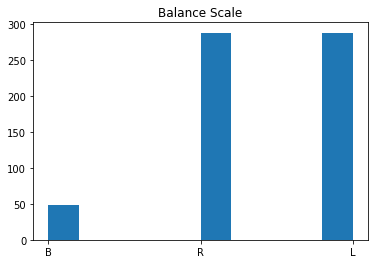

In [3]:
plt.title('Balance Scale')
plt.hist(df_balance['Class'].astype(str))
plt.show()

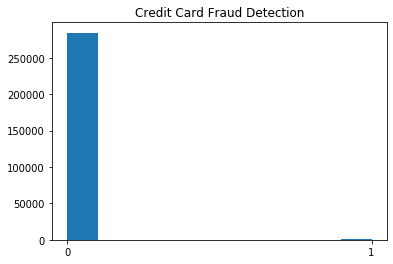

In [4]:
plt.title('Credit Card Fraud Detection')
plt.hist(df_credit['Class'].astype(str))
plt.show()

## Methods to obtain statistics about dataset

### Imbalance ratio

Function to calculate imbalance ratio between **two** classes.

In [5]:
imbalance_ratio(df_credit['Class'])

'1 : 577.9'

### Labeling minority class exapmles using safe level

For binary datasets:

In [6]:
label_minority(X=df_credit.drop(columns='Class').to_numpy(), y=df_credit['Class'].to_numpy(),
               k=5, kernel=False, unit='percent')

,safe,borderline,rare,outlier
1,5.69,6.3,12.6,75.41


Parameters used by this function:
* X, y - atributes vectors and scalar targets.
* k - size of neighbourhood for calculating safe levels.
* kernel - if equal to True, it will use kernel method described [here](papers/Types_of_minority_class_examples_and_their_influen.pdf#page=13).
* unit - 'absolute' for absolute values (counts); 'percent' for percentages.

For multiclass datasets:

In [7]:
label_minority_mul(X=df_balance.drop(columns='Class').to_numpy(), y=df_balance['Class'].to_numpy(),
               similarities_matrix=None, k=5, unit='absolute')

,safe,borderline,rare,outlier
B,0,0,49,0
L,288,0,0,0
R,288,0,0,0


Parameters used by this function:

* X, y - atributes vectors and scalar targets.
* similarities_matrix - matrix of similarities between classes used to calculate safe levels. If it is not provided heuristic described [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=5) is used.
* k - size of neighbourhood for calculating safe levels.
* unit - 'absolute' for absolute values; 'percent' for percentages.

## Methods for resampling imbalanced data into balanced one

### Similarity Oversampling algorithm

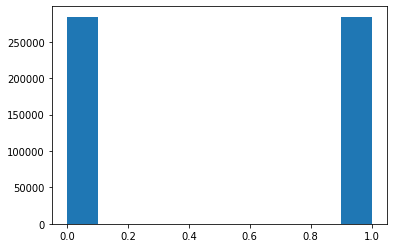

In [8]:
so = SimilarityOversampling(X=df_credit.drop(columns='Class').to_numpy(), y=df_credit['Class'].to_numpy(),
                            similarities_matrix=None, k=5)
X, y = so.run()

plt.hist(y)
plt.show()

Parameters used by this function:

* X, y - atributes vectors and scalar targets.
* similarities_matrix - matrix of similarities between classes used to calculate safe levels. If it is not provided heuristic described [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=5) is used.
* k - size of neighbourhood for calculating safe levels.

Algorithm's pseudocode can be found [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=7).

### Similarity Undersampling algorithm

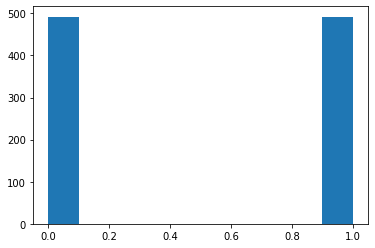

In [9]:
su = SimilarityUndersampling(X=df_credit.drop(columns='Class').to_numpy(), y=df_credit['Class'].to_numpy(),
                            similarities_matrix=None, k=5)
X, y = su.run()

plt.hist(y)
plt.show()

Parameters used by this function:

* X, y - atributes vectors and scalar targets.
* similarities_matrix - matrix of similarities between classes used to calculate safe levels. If it is not provided heuristic described [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=5) is used.
* k - size of neighbourhood for calculating safe levels.

Algorithm's pseudocode can be found [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=7).

### Similarity Oversampling and Undersampling Preprocessing (SOUP) algoritm

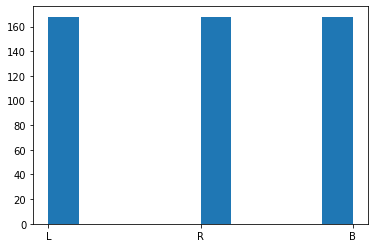

In [10]:
soup = SOUP(X=df_balance.drop(columns='Class').to_numpy(), y=df_balance['Class'].to_numpy(),
                            similarities_matrix=None, k=5)
X, y = soup.run()

plt.hist(y)
plt.show()

Parameters used by this function:

* X, y - atributes vectors and scalar targets.
* similarities_matrix - matrix of similarities between classes used to calculate safe levels. If it is not provided heuristic described [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=5) is used.
* k - size of neighbourhood for calculating safe levels.

Algorithm's pseudocode can be found [here](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf#page=6).

### Papers describing methods in detail

* [Types of minority class examples and their influence
on learning classifiers from imbalanced data](papers/Types_of_minority_class_examples_and_their_influen.pdf)
* [Using information on class interrelations to improve classification of multiclass imbalanced data: a new resampling algorithm](papers/Using_Information_on_Class_Interrelations_to_Impro.pdf)